In [7]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

In [8]:
data_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/integrated16.csv'
label_path = '~/Documents/study/Masters DSS/Thesis/Data/AMB_integrated/Labels16.csv'

X, Y = load_dataset(data_path, label_path)
print("shape of data: ", X.shape)
print("shape of labels:", Y.shape)

shape of data:  (1298, 2000)
shape of labels: (1298, 2)


In [9]:
Y = Y['cluster']
print("shape of labels now: ", Y.shape)

shape of labels now:  (1298,)


In [10]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(1298, 41)
shape of train set:  (1038, 2000)  and labels:  (1038, 41) 

shape of test set:  (260, 2000)  and labels:  (260, 41) 

Shape of train and validation set to check for overfitting
shape of train set:  (934, 2000)  and labels:  (934, 41) 

shape of validation set:  (104, 2000)  and labels:  (104, 41)


In [11]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("trainset")
print(pd.value_counts(inv_train))
print("testset")
print(pd.value_counts(inv_test))

trainset
L2/3 Ptgs2         74
Sst Cbln4          53
L4 Scnn1a          51
L6a Sla            50
Pvalb Tacr3        50
L5a Batf3          46
Pvalb Gpx3         43
L4 Ctxn3           43
Pvalb Wt1          37
Vip Chat           37
L6a Mgp            37
Vip Gpc3           34
L5a Hsd11b1        33
Sst Chodl          33
L5b Cdh13          31
Sst Myh8           30
Vip Parm1          29
L4 Arf5            25
Ndnf Cxcl14        24
L5b Tph2           24
Ndnf Car4          19
Vip Mybpc1         18
Pvalb Rspo2        17
L5a Tcerg1l        16
L6a Car12          13
L6b Serpinb11      13
Pvalb Obox3        13
L2 Ngb             13
Sst Th             13
Pvalb Cpne5        11
Sst Cdk6           11
Sst Tacstd2        10
L6a Syt17          10
L6b Rgs12          10
L5 Ucma            10
L5a Pde1c          10
Smad3              10
Vip Sncg           10
Pvalb Tpbg 2016    10
L5 Chrna6           9
Igtp                8
dtype: int64
testset
L2/3 Ptgs2         19
Pvalb Tacr3        13
L4 Scnn1a          13
Ss

## Linear SVM performance

shape of labels in training set:  (1038,)
shape of labels in test set:  (260,)
Training time: 3.2271642684936523
Predict time: 0.020426034927368164
Accuracy of test set:  0.9192307692307692
F1-score of test set:  0.910933597005215
Precision of test set: 0.9218121461871462
Recall of test set: 0.9192307692307692
Classification report of test set:
                  precision    recall  f1-score   support

           Igtp       1.00      1.00      1.00         2
         L2 Ngb       1.00      1.00      1.00         3
     L2/3 Ptgs2       1.00      1.00      1.00        19
        L4 Arf5       1.00      0.83      0.91         6
       L4 Ctxn3       1.00      0.91      0.95        11
      L4 Scnn1a       0.93      1.00      0.96        13
      L5 Chrna6       1.00      1.00      1.00         2
        L5 Ucma       1.00      1.00      1.00         2
      L5a Batf3       0.86      1.00      0.92        12
    L5a Hsd11b1       0.82      1.00      0.90         9
      L5a Pde1c       0.

/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


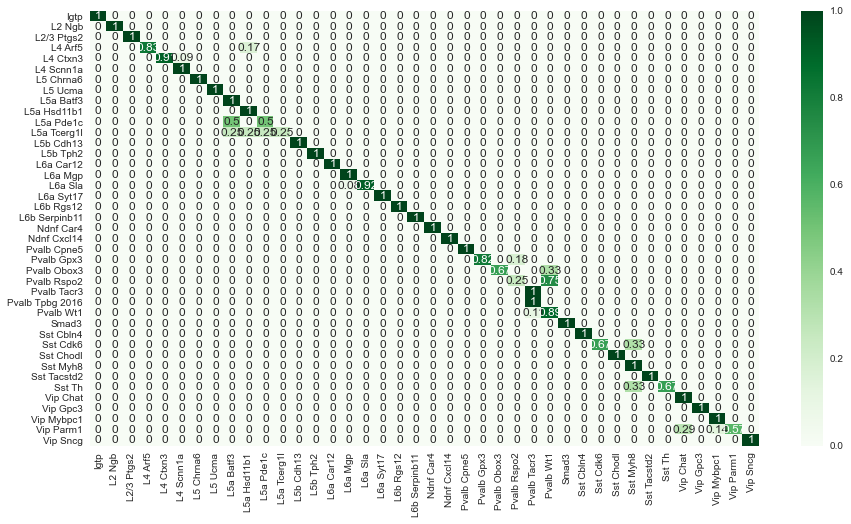

In [12]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

## ANN performance

Train the model to check for overfitting


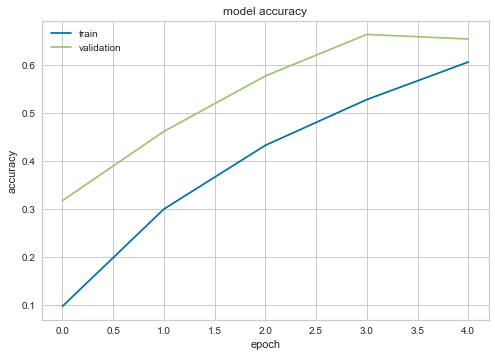

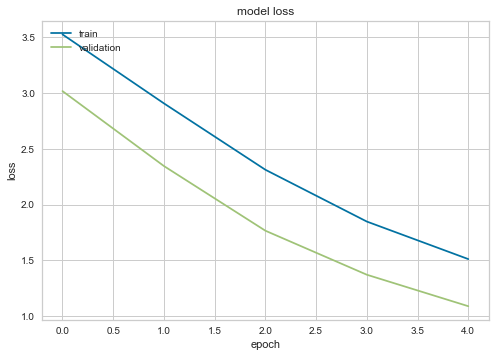

train the final model
Epoch 1/5
33/33 [==============================] - 0s 10ms/step - loss: 1.2705 - accuracy: 0.6281
Epoch 2/5
33/33 [==============================] - 0s 9ms/step - loss: 1.0970 - accuracy: 0.6879
Epoch 3/5
33/33 [==============================] - 0s 12ms/step - loss: 0.9850 - accuracy: 0.7177
Epoch 4/5
33/33 [==============================] - 1s 18ms/step - loss: 0.8431 - accuracy: 0.7437
Epoch 5/5
33/33 [==============================] - 1s 21ms/step - loss: 0.7444 - accuracy: 0.7794
Training time: 2.4362878799438477
Predict time: 0.23143506050109863
The results are as follows:
Accuracy of test set:  0.85
F1-score of test set:  0.8199375065138995
Precision of test set: 0.8234069362010539
Recall of test set: 0.85
Classification report of test set:
                  precision    recall  f1-score   support

           Igtp       0.00      0.00      0.00         2
         L2 Ngb       0.00      0.00      0.00         3
     L2/3 Ptgs2       0.86      1.00      0.93  

/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


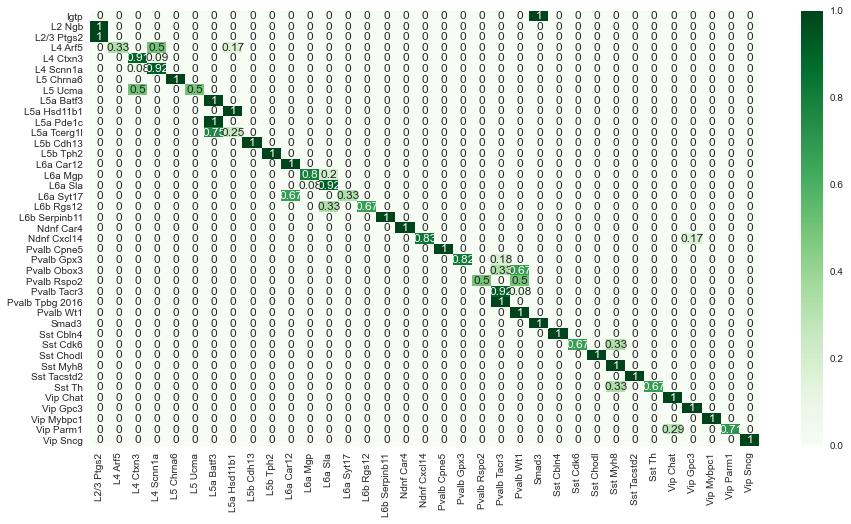

In [5]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


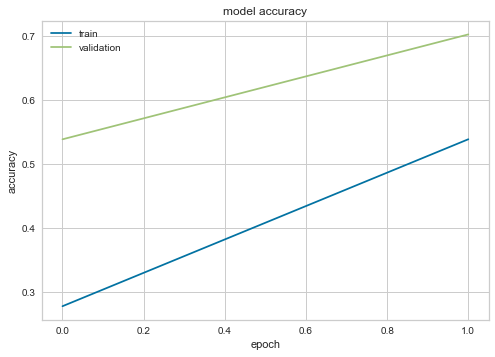

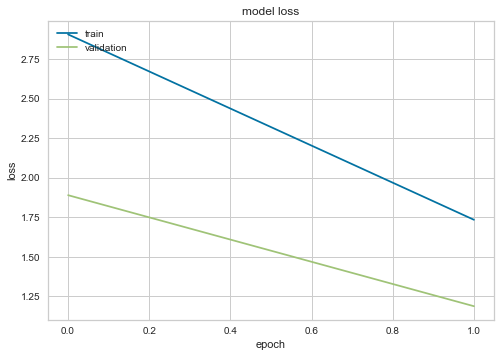

train the final model
Epoch 1/2
33/33 [==============================] - 7s 229ms/step - loss: 1.2011 - accuracy: 0.6676
Epoch 2/2
33/33 [==============================] - 6s 190ms/step - loss: 0.8940 - accuracy: 0.7514
Training time: 13.815418720245361
Predict time: 0.3162651062011719
The results are as follows:
Accuracy of test set:  0.8461538461538461
F1-score of test set:  0.8057512435015496
Precision of test set: 0.7879479833891598
Recall of test set: 0.8461538461538461
Classification report of test set:
                  precision    recall  f1-score   support

           Igtp       1.00      0.50      0.67         2
         L2 Ngb       0.00      0.00      0.00         3
     L2/3 Ptgs2       0.86      1.00      0.93        19
        L4 Arf5       1.00      0.83      0.91         6
       L4 Ctxn3       0.92      1.00      0.96        11
      L4 Scnn1a       1.00      0.92      0.96        13
      L5 Chrna6       1.00      1.00      1.00         2
        L5 Ucma       1.00 

/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vartika/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


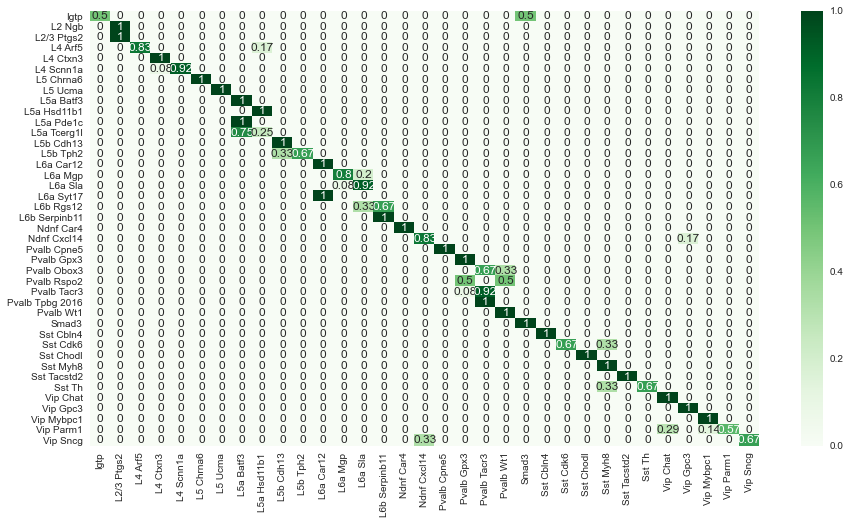

In [6]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)